## Importing Libraries

In this block, we import the necessary libraries for our machine learning project. Here's a brief explanation of each library:

- `pandas as pd`: This library is used for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series.
- `sklearn.model_selection`: This module provides functions to split arrays or matrices into random train and test subsets. 
- `transformers`: This library offers state-of-the-art pre-trained models for natural language processing (NLP) tasks. It includes implementations of various transformer architectures.
- `torch`: PyTorch is an open-source machine learning library based on the Torch library. It provides tensor computation with strong GPU acceleration and deep neural networks built on a tape-based autograd system.
- `sklearn.metrics`: This module implements functions to evaluate the accuracy of a classification model. It includes functions for computing accuracy scores, generating classification reports, and creating confusion matrices.
- `numpy as np`: NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- `matplotlib.pyplot as plt`: Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.
- `seaborn as sns`: Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.preprocess import preprocess_dataset

## Additional Library Installation

If the `hazm` library has not been installed, use pip:

```bash
!pip install hazm

## Preprocessing Text Data

In this block of code, we preprocess text data using the 'hazm' library. Here's a breakdown of the steps:

1. **Importing Libraries**:
   - `pandas as pd`: Imported for data manipulation.
   - `word_tokenize, stopwords_list, Normalizer, Lemmatizer`: These are functions and classes from the 'hazm' library used for Persian text processing.

2. **Loading the Dataset**:
   - The dataset is loaded from a CSV file named "persian_authors.csv" using the `pd.read_csv()` function from pandas.

3. **Text Normalization and Tokenization**:
   - A normalizer is defined using `Normalizer()` to normalize the texts.
   - The `preprocess_text()` function is defined to tokenize the text, remove stopwords, and normalize the texts using the defined normalizer.
   - The function uses `word_tokenize()` to tokenize the text, `stopwords_list()` to remove stopwords, and the normalizer to normalize the text.

4. **Limiting Text Length**:
   - The `limit_df()` function is defined to limit the number of words in each text to a specified number (`n_word`). This function splits the text into words, keeps the first `n_word` words, and then joins them back into a single string.
   - The `map()` function is used to apply the `limit_df()` function to each text in the dataset.

5. **Shuffling the Dataset**:
   - The dataset is shuffled using `sample(frac=1, random_state=42)` to ensure randomness in the data.

6. **Displaying the Preprocessed Dataset**:
   - The first few rows of the preprocessed dataset are printed using `print(df.head())`.


In [2]:
# Load the dataset
df = pd.read_csv("datasets/raw/persian_authors.csv")

df = preprocess_dataset(df, save_file="datasets/processed/persian_authors_processed.csv")

## Visualizing Text Distribution per Author

This block of code creates a countplot to visualize the distribution of texts per author. Here's an explanation of the visualization code:

- `plt.figure(figsize=(10,6))`: This line creates a new figure with a specified size of 10 inches by 6 inches.

- `sns.countplot(data=df, x='author')`: This line creates a countplot using Seaborn's `countplot()` function. It counts the number of occurrences of each unique value in the 'author' column of the DataFrame `df` and displays the counts as bars.

- `plt.title('Number of Texts per Author')`: This line sets the title of the plot to 'Number of Texts per Author'.

- `plt.xlabel('Author')`: This line sets the label for the x-axis to 'Author'.

- `plt.ylabel('Count')`: This line sets the label for the y-axis to 'Count'.

- `plt.xticks(rotation=45)`: This line rotates the x-axis labels by 45 degrees for better readability.

- `plt.show()`: This line displays the plot.


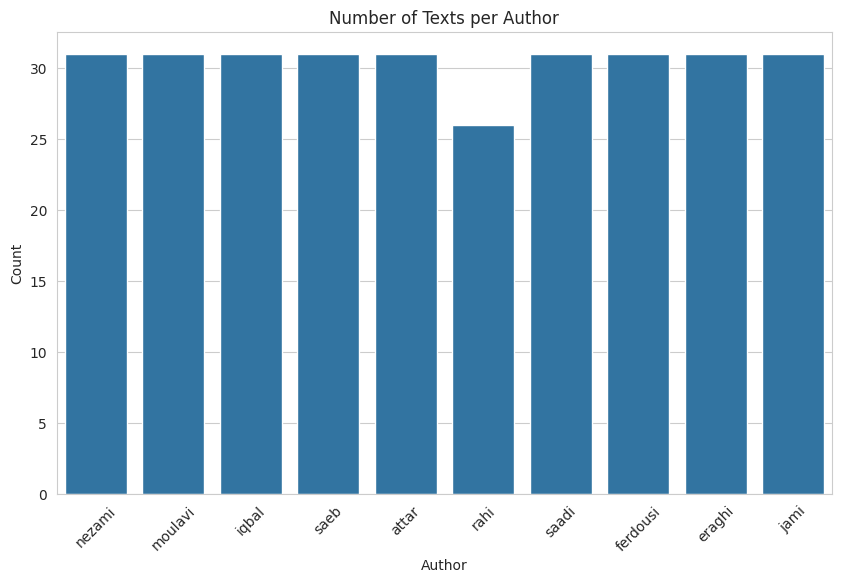

In [3]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='author')
plt.title('Number of Texts per Author')
plt.xlabel('Author')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Visualizing Word Count Distribution per Author

In this block of code, we visualize the distribution of word counts per author using a histogram. Here's an explanation of the visualization code:

- `df['word_count'] = df['text'].str.count(' ') + 1`: This line calculates the word count for each text in the 'text' column of the DataFrame `df` by counting the spaces and adding one. The result is stored in a new column named 'word_count'.

- `sns.histplot(data=df, x='word_count', hue='author', kde=True)`: This line creates a histogram using Seaborn's `histplot()` function. It plots the distribution of word counts (`x='word_count'`) and uses the 'author' column to distinguish between different authors (`hue='author'`). The `kde=True` parameter adds a kernel density estimate to the plot.

- `plt.show()`: This line displays the plot.


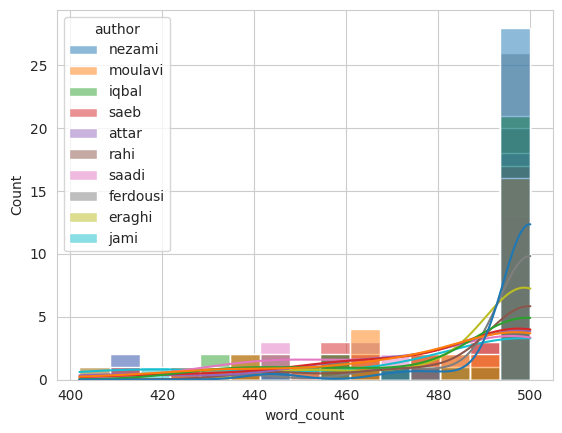

In [4]:
#Count spaces plus one for number of words
df['word_count'] = df['text'].str.count(' ') + 1

sns.histplot(data=df, x='word_count', hue='author', kde=True)
plt.show()

## Determining the Number of Unique Labels

In this block of code, the number of unique labels (authors) in the dataset is determined. Here's an explanation:

- `num_labels=len(df['author'].unique())`: This line calculates the number of unique labels (authors) in the 'author' column of the DataFrame `df`. It uses the `unique()` function to extract unique values and then calculates the length of the resulting array, which represents the number of unique authors in the dataset.


In [34]:
num_labels=len(df['author'].unique())

## Importing Classification Models

In this block of code, classification models are imported from the scikit-learn library. Here's an explanation of each imported model:

- `LogisticRegression`: This class implements logistic regression, which is a linear model for binary and multiclass classification.
- `RandomForestClassifier`: This class implements a random forest classifier, which is an ensemble learning method that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
- `SVC`: This class implements a support vector classifier (SVC), which is a type of support vector machine (SVM) algorithm that supports linear and non-linear classification.

These models can be used for classification tasks based on the specific requirements and characteristics of the dataset.


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


## Creating Label Dictionary

In this block of code, a label dictionary is created to map author names to numerical indices. Here's an explanation:

- `label_dict = {author: idx for idx, author in enumerate(df['author'].unique())}`: This line creates a dictionary comprehension to iterate over unique author names extracted from the 'author' column of the DataFrame `df`. For each author name, it assigns a numerical index starting from 0 using the `enumerate()` function. The resulting dictionary `label_dict` maps each author name to its corresponding numerical index.

This label dictionary is typically used for encoding categorical labels into numerical format, which is required by many machine learning algorithms.


In [36]:
label_dict = {author: idx for idx, author in enumerate(df['author'].unique())}

## Encoding Labels and Splitting Dataset

In this block of code, labels are encoded using scikit-learn's `LabelEncoder` and the dataset is split into training, validation, and test sets. Here's an explanation:

- `label_encoder = LabelEncoder()`: This line creates an instance of the `LabelEncoder` class, which is used to encode categorical labels into numerical format.

- `df['author_encoded'] = label_encoder.fit_transform(df['author'])`: This line encodes the 'author' column of the DataFrame `df` into numerical labels using the `fit_transform()` method of the `LabelEncoder`. The encoded labels are stored in a new column named 'author_encoded' in the DataFrame.

- `train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], df['author_encoded'], test_size=0.2, random_state=42)`: This line splits the dataset into training and test sets using the `train_test_split()` function from scikit-learn. It splits the text data ('text' column) and the encoded labels ('author_encoded' column) into training and test sets, with 80% of the data used for training and 20% for testing. The `random_state=42` parameter ensures reproducibility of the split.

- `train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.1, random_state=42)`: This line further splits the training data (obtained from the previous split) into training and validation sets. It uses 90% of the training data for training and 10% for validation. Again, `random_state=42` is used for reproducibility.


In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['author_encoded'] = label_encoder.fit_transform(df['author'])

# Split dataset into train, validation, and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], df['author_encoded'], test_size=0.2, random_state=42)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.1, random_state=42)

## TF-IDF Vectorization and Logistic Regression Classification

In this block of code, TF-IDF vectorization and logistic regression classification are applied to the dataset. Here's an explanation of each step:

- **TF-IDF Vectorization**:
  - `tfidf_vectorizer = TfidfVectorizer(max_features=10000)`: This line initializes a TF-IDF vectorizer with a maximum of 10,000 features. TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents.
  - `X_train_tfidf = tfidf_vectorizer.fit_transform(train_texts)`: This line fits and transforms the training texts (`train_texts`) into TF-IDF features using the `fit_transform()` method of the TF-IDF vectorizer. 
  - `X_val_tfidf = tfidf_vectorizer.transform(val_texts)`: This line transforms the validation texts (`val_texts`) into TF-IDF features using the `transform()` method of the TF-IDF vectorizer, based on the vocabulary learned from the training data.
  - `X_test_tfidf = tfidf_vectorizer.transform(test_texts)`: This line transforms the test texts (`test_texts`) into TF-IDF features using the `transform()` method of the TF-IDF vectorizer, based on the same vocabulary learned from the training data.

- **Logistic Regression Classification**:
  - `lr_classifier = LogisticRegression(max_iter=1000)`: This line initializes a logistic regression classifier with a maximum of 1000 iterations.
  - `lr_classifier.fit(X_train_tfidf, train_labels)`: This line trains the logistic regression classifier on the TF-IDF features of the training data (`X_train_tfidf`) and their corresponding labels (`train_labels`).

- **Validation and Test Evaluation**:
  - Validation Set:
    - `val_predictions = lr_classifier.predict(X_val_tfidf)`: This line makes predictions on the validation set (`X_val_tfidf`) using the trained logistic regression classifier.
    - `val_accuracy = accuracy_score(val_labels, val_predictions)`: This line calculates the accuracy of the validation predictions compared to the actual validation labels.
    - `print("Validation Accuracy:", val_accuracy)`: This line prints the validation accuracy.
    - `print("Classification Report:")`: This line prints the classification report, which includes precision, recall, F1-score, and support for each class.
    - `print(classification_report(val_labels, val_predictions))`: This line prints the classification report for the validation set.
  - Test Set:
    - `test_predictions = lr_classifier.predict(X_test_tfidf)`: This line makes predictions on the test set (`X_test_tfidf`) using the trained logistic regression classifier.
    - `test_accuracy = accuracy_score(test_labels, test_predictions)`: This line calculates the accuracy of the test predictions compared to the actual test labels.
    - `print("Test Accuracy:", test_accuracy)`: This line prints the test accuracy.
    - `print("Classification Report:")`: This line prints the classification report for the test set.
    - `print(classification_report(test_labels, test_predictions))`: This line prints the classification report for the test set.

This process involves transforming text data into numerical features using TF-IDF vectorization and training a logistic regression classifier to predict the authors of the texts. The model is then evaluated on both the validation and test sets using accuracy and classification reports. Adjustments can be made to the TF-IDF vectorizer parameters and model hyperparameters for further optimization.


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features as needed

# Fit and transform on train texts
X_train_tfidf = tfidf_vectorizer.fit_transform(train_texts)
X_val_tfidf = tfidf_vectorizer.transform(val_texts)
X_test_tfidf = tfidf_vectorizer.transform(test_texts)

# Initialize and train Logistic Regression model
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, train_labels)

# Predictions on validation set
val_predictions = lr_classifier.predict(X_val_tfidf)

# Evaluate model
val_accuracy = accuracy_score(val_labels, val_predictions)
print("Validation Accuracy:", val_accuracy)
print("Classification Report:")
print(classification_report(val_labels, val_predictions))

# Predictions on test set
test_predictions = lr_classifier.predict(X_test_tfidf)

# Evaluate model on test set
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)
print("Classification Report:")
print(classification_report(test_labels, test_predictions))


Validation Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         1

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Test Accuracy: 0.975
Classifica

## Preprocessing and Predicting New Text

In this block of code, new text is preprocessed and predicted using the trained logistic regression classifier. Here's an explanation of each step:

- **Preprocessing New Text**:
  - Each text in the test set (`test_texts`) is preprocessed using the `preprocess_text()` function to normalize, tokenize, and remove stopwords.

- **Transforming Text into Features**:
  - The preprocessed text is transformed into features using the TF-IDF vectorizer (`tfidf_vectorizer.transform()`).

- **Predicting Label of New Text**:
  - The logistic regression classifier (`lr_classifier`) predicts the label of the new text using `predict()`.

- **Mapping Predicted Label to Author Name**:
  - The predicted label is mapped back to the corresponding author name using the `label_dict` dictionary.
  - The original author label and predicted author label are retrieved from the `test_labels` and `predicted_label`, respectively.

- **Accuracy Calculation**:
  - A counter (`lr_cnt`) is used to count the number of correct predictions.
  - The accuracy is calculated as the ratio of correct predictions to the total number of predictions.

- **Printing Predictions**:
  - The predicted author name, original author name, predicted label, and original label are printed for each prediction.

- **Printing Accuracy**:
  - The accuracy of the logistic regression classifier on the test set is printed.

This process demonstrates how to preprocess new text, transform it into features using TF-IDF vectorization, predict the author label using the logistic regression classifier, and calculate accuracy.


In [39]:
from src.preprocess import preprocess_text

# Preprocess the new text
lr_cnt =0
for i in range(len(test_texts)):
    cleaned_new_text = preprocess_text(test_texts.iloc[i])

    # Transform the preprocessed text into features using TF-IDF vectorizer
    new_text_tfidf = tfidf_vectorizer.transform([cleaned_new_text])

    # Predict label of the new text
    predicted_label = lr_classifier.predict(new_text_tfidf)

    # Map predicted label back to author name
    predicted_author = [author for author, idx in label_dict.items() if idx == predicted_label.item()][0]
    original_author = [author for author, idx in label_dict.items() if idx == test_labels.iloc[i]][0]
    if test_labels.iloc[i]== predicted_label.item():
        lr_cnt+=1
    print("Predicted Author:", predicted_author , "original label:",original_author )
    print("Predicted Author:", predicted_label.item() , "original label:",test_labels.iloc[i] )
print("accuracy : " , lr_cnt/len(test_texts))

Predicted Author: saadi original label: saadi
Predicted Author: 10 original label: 10
Predicted Author: ferdousi original label: ferdousi
Predicted Author: 4 original label: 4
Predicted Author: moulavi original label: moulavi
Predicted Author: 8 original label: 8
Predicted Author: jami original label: jami
Predicted Author: 11 original label: 11
Predicted Author: jami original label: jami
Predicted Author: 11 original label: 11
Predicted Author: saadi original label: saadi
Predicted Author: 10 original label: 10
Predicted Author: saadi original label: saadi
Predicted Author: 10 original label: 10
Predicted Author: ahamad seif original label: ahamad seif
Predicted Author: 0 original label: 0
Predicted Author: saadi original label: saadi
Predicted Author: 10 original label: 10
Predicted Author: rahi original label: rahi
Predicted Author: 2 original label: 2
Predicted Author: saeb original label: saeb
Predicted Author: 12 original label: 12
Predicted Author: moulavi original label: moulav

## Random Forest Classification

In this block of code, a Random Forest Classifier model is initialized, trained, and evaluated on the dataset. Here's an explanation of each step:

- **Initializing and Training Random Forest Classifier**:
  - `rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)`: This line initializes a Random Forest Classifier with 100 decision trees (`n_estimators=100`) and a random state of 42 for reproducibility.
  - `rf_classifier.fit(X_train_tfidf, train_labels)`: This line trains the Random Forest Classifier on the TF-IDF features of the training data (`X_train_tfidf`) and their corresponding labels (`train_labels`).

- **Validation Evaluation**:
  - `val_predictions_rf = rf_classifier.predict(X_val_tfidf)`: This line makes predictions on the validation set (`X_val_tfidf`) using the trained Random Forest Classifier.
  - `val_accuracy_rf = accuracy_score(val_labels, val_predictions_rf)`: This line calculates the accuracy of the Random Forest Classifier on the validation set compared to the actual validation labels.
  - `print("Random Forest Validation Accuracy:", val_accuracy_rf)`: This line prints the validation accuracy.
  - `print("Random Forest Classification Report:")`: This line prints the classification report, which includes precision, recall, F1-score, and support for each class, for the Random Forest Classifier on the validation set.
  - `print(classification_report(val_labels, val_predictions_rf))`: This line prints the classification report for the validation set.

- **Test Evaluation**:
  - `test_predictions_rf = rf_classifier.predict(X_test_tfidf)`: This line makes predictions on the test set (`X_test_tfidf`) using the trained Random Forest Classifier.
  - `test_accuracy_rf = accuracy_score(test_labels, test_predictions_rf)`: This line calculates the accuracy of the Random Forest Classifier on the test set compared to the actual test labels.
  - `print("Random Forest Test Accuracy:", test_accuracy_rf)`: This line prints the test accuracy.
  - `print("Random Forest Classification Report:")`: This line prints the classification report for the test set, including precision, recall, F1-score, and support for each class, for the Random Forest Classifier.
  - `print(classification_report(test_labels, test_predictions_rf))`: This line prints the classification report for the test set.

This process involves training a Random Forest Classifier on TF-IDF features and evaluating its performance on the validation and test sets using accuracy and classification reports.


In [40]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, train_labels)

# Predictions on validation set
val_predictions_rf = rf_classifier.predict(X_val_tfidf)

# Evaluate model
val_accuracy_rf = accuracy_score(val_labels, val_predictions_rf)
print("Random Forest Validation Accuracy:", val_accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(val_labels, val_predictions_rf))

# Predictions on test set
test_predictions_rf = rf_classifier.predict(X_test_tfidf)

# Evaluate model on test set
test_accuracy_rf = accuracy_score(test_labels, test_predictions_rf)
print("Random Forest Test Accuracy:", test_accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(test_labels, test_predictions_rf))


Random Forest Validation Accuracy: 0.96875
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      0.83      0.91         6
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         5
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         1

    accuracy                           0.97        32
   macro avg       0.98      0.99      0.98        32
weighted avg       0.98      0.97      0.97        32


## Preprocessing and Predicting New Text with Random Forest Classifier

In this block of code, new text is preprocessed and predicted using the trained Random Forest Classifier. Here's an explanation of each step:

- **Preprocessing New Text**:
  - Each text in the test set (`test_texts`) is preprocessed using the `preprocess_text()` function to normalize, tokenize, and remove stopwords.

- **Transforming Text into Features**:
  - The preprocessed text is transformed into features using the TF-IDF vectorizer (`tfidf_vectorizer.transform()`).

- **Predicting Label of New Text**:
  - The Random Forest Classifier (`rf_classifier`) predicts the label of the new text using `predict()`.

- **Mapping Predicted Label to Author Name**:
  - The predicted label is mapped back to the corresponding author name using the `label_dict` dictionary.
  - The original author label and predicted author label are retrieved from the `test_labels` and `predicted_label`, respectively.

- **Accuracy Calculation**:
  - A counter (`rf_cnt`) is used to count the number of correct predictions.
  - The accuracy is calculated as the ratio of correct predictions to the total number of predictions.

- **Printing Predictions**:
  - The predicted author name, original author name, predicted label, and original label are printed for each prediction.

- **Printing Accuracy**:
  - The accuracy of the Random Forest Classifier on the test set is printed.

This process demonstrates how to preprocess new text, transform it into features using TF-IDF vectorization, predict the author label using the Random Forest Classifier, and calculate accuracy.


In [44]:
# Preprocess the new text
rf_cnt = 0
for i in range(len(test_texts)):
    cleaned_new_text = preprocess_text(test_texts.iloc[i])

    # Transform the preprocessed text into features using TF-IDF vectorizer
    new_text_tfidf = tfidf_vectorizer.transform([cleaned_new_text])

    # Predict label of the new text
    predicted_label = rf_classifier.predict(new_text_tfidf)

    # Map predicted label back to author name
    predicted_author = [author for author, idx in label_dict.items() if idx == predicted_label.item()][0]
    original_author = [author for author, idx in label_dict.items() if idx == test_labels.iloc[i]][0]
    if test_labels.iloc[i]== predicted_label.item():
        rf_cnt+=1
    print("Predicted Author:", predicted_author , "original label:",original_author )
    print("Predicted Author:", predicted_label.item() , "original label:",test_labels.iloc[i] )
print("accuracy : " , rf_cnt/len(test_texts))

Predicted Author: saadi original label: saadi
Predicted Author: 10 original label: 10
Predicted Author: ferdousi original label: ferdousi
Predicted Author: 4 original label: 4
Predicted Author: moulavi original label: moulavi
Predicted Author: 8 original label: 8
Predicted Author: jami original label: jami
Predicted Author: 11 original label: 11
Predicted Author: jami original label: jami
Predicted Author: 11 original label: 11
Predicted Author: saadi original label: saadi
Predicted Author: 10 original label: 10
Predicted Author: saadi original label: saadi
Predicted Author: 10 original label: 10
Predicted Author: ahamad seif original label: ahamad seif
Predicted Author: 0 original label: 0
Predicted Author: saadi original label: saadi
Predicted Author: 10 original label: 10
Predicted Author: rahi original label: rahi
Predicted Author: 2 original label: 2
Predicted Author: saeb original label: saeb
Predicted Author: 12 original label: 12
Predicted Author: moulavi original label: moulav

## Support Vector Machine (SVM) Classification

In this block of code, a Support Vector Machine (SVM) Classifier model is initialized, trained, and evaluated on the dataset. Here's an explanation of each step:

- **Initializing and Training SVM Classifier**:
  - `svm_classifier = SVC(kernel='linear', random_state=42)`: This line initializes an SVM Classifier with a linear kernel and a random state of 42 for reproducibility.
  - `svm_classifier.fit(X_train_tfidf, train_labels)`: This line trains the SVM Classifier on the TF-IDF features of the training data (`X_train_tfidf`) and their corresponding labels (`train_labels`).

- **Validation Evaluation**:
  - `val_predictions_svm = svm_classifier.predict(X_val_tfidf)`: This line makes predictions on the validation set (`X_val_tfidf`) using the trained SVM Classifier.
  - `val_accuracy_svm = accuracy_score(val_labels, val_predictions_svm)`: This line calculates the accuracy of the SVM Classifier on the validation set compared to the actual validation labels.
  - `print("SVM Validation Accuracy:", val_accuracy_svm)`: This line prints the validation accuracy.
  - `print("SVM Classification Report:")`: This line prints the classification report, which includes precision, recall, F1-score, and support for each class, for the SVM Classifier on the validation set.
  - `print(classification_report(val_labels, val_predictions_svm))`: This line prints the classification report for the validation set.

- **Test Evaluation**:
  - `test_predictions_svm = svm_classifier.predict(X_test_tfidf)`: This line makes predictions on the test set (`X_test_tfidf`) using the trained SVM Classifier.
  - `test_accuracy_svm = accuracy_score(test_labels, test_predictions_svm)`: This line calculates the accuracy of the SVM Classifier on the test set compared to the actual test labels.
  - `print("SVM Test Accuracy:", test_accuracy_svm)`: This line prints the test accuracy.
  - `print("SVM Classification Report:")`: This line prints the classification report for the test set, including precision, recall, F1-score, and support for each class, for the SVM Classifier.
  - `print(classification_report(test_labels, test_predictions_svm))`: This line prints the classification report for the test set.

This process involves training an SVM Classifier on TF-IDF features and evaluating its performance on the validation and test sets using accuracy and classification reports.


In [42]:
from sklearn.svm import SVC

# Initialize and train SVM Classifier model
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_tfidf, train_labels)

# Predictions on validation set
val_predictions_svm = svm_classifier.predict(X_val_tfidf)

# Evaluate model
val_accuracy_svm = accuracy_score(val_labels, val_predictions_svm)
print("SVM Validation Accuracy:", val_accuracy_svm)
print("SVM Classification Report:")
print(classification_report(val_labels, val_predictions_svm))

# Predictions on test set
test_predictions_svm = svm_classifier.predict(X_test_tfidf)

# Evaluate model on test set
test_accuracy_svm = accuracy_score(test_labels, test_predictions_svm)
print("SVM Test Accuracy:", test_accuracy_svm)
print("SVM Classification Report:")
print(classification_report(test_labels, test_predictions_svm))


SVM Validation Accuracy: 1.0
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         1

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

SVM Test Accuracy: 0.97

## Preprocessing and Predicting New Text with SVM Classifier

In this block of code, new text is preprocessed and predicted using the trained SVM Classifier. Here's an explanation of each step:

- **Preprocessing New Text**:
  - Each text in the test set (`test_texts`) is preprocessed using the `preprocess_text()` function to normalize, tokenize, and remove stopwords.

- **Transforming Text into Features**:
  - The preprocessed text is transformed into features using the TF-IDF vectorizer (`tfidf_vectorizer.transform()`).

- **Predicting Label of New Text**:
  - The SVM Classifier (`svm_classifier`) predicts the label of the new text using `predict()`.

- **Mapping Predicted Label to Author Name**:
  - The predicted label is mapped back to the corresponding author name using the `label_dict` dictionary.
  - The original author label and predicted author label are retrieved from the `test_labels` and `predicted_label`, respectively.

- **Accuracy Calculation**:
  - A counter (`svm_cnt`) is used to count the number of correct predictions.
  - The accuracy is calculated as the ratio of correct predictions to the total number of predictions.

- **Printing Predictions**:
  - The predicted author name, original author name, predicted label, and original label are printed for each prediction.

- **Printing Accuracy**:
  - The accuracy of the SVM Classifier on the test set is printed.

This process demonstrates how to preprocess new text, transform it into features using TF-IDF vectorization, predict the author label using the SVM Classifier, and calculate accuracy.


In [45]:
# Preprocess the new text
svm_cnt=0
for i in range(len(test_texts)):
    cleaned_new_text = preprocess_text(test_texts.iloc[i])

    # Transform the preprocessed text into features using TF-IDF vectorizer
    new_text_tfidf = tfidf_vectorizer.transform([cleaned_new_text])

    # Predict label of the new text
    predicted_label = svm_classifier.predict(new_text_tfidf)

    # Map predicted label back to author name
    predicted_author = [author for author, idx in label_dict.items() if idx == predicted_label.item()][0]
    original_author = [author for author, idx in label_dict.items() if idx == test_labels.iloc[i]][0]
    if test_labels.iloc[i]== predicted_label.item():
        svm_cnt+=1
    print("Predicted Author:", predicted_author , "original label:",original_author )
    print("Predicted Author:", predicted_label.item() , "original label:",test_labels.iloc[i] )
print("accuracy : " , svm_cnt/len(test_texts))

Predicted Author: saadi original label: saadi
Predicted Author: 10 original label: 10
Predicted Author: ferdousi original label: ferdousi
Predicted Author: 4 original label: 4
Predicted Author: moulavi original label: moulavi
Predicted Author: 8 original label: 8
Predicted Author: jami original label: jami
Predicted Author: 11 original label: 11
Predicted Author: jami original label: jami
Predicted Author: 11 original label: 11
Predicted Author: saadi original label: saadi
Predicted Author: 10 original label: 10
Predicted Author: saadi original label: saadi
Predicted Author: 10 original label: 10
Predicted Author: ahamad seif original label: ahamad seif
Predicted Author: 0 original label: 0
Predicted Author: saadi original label: saadi
Predicted Author: 10 original label: 10
Predicted Author: rahi original label: rahi
Predicted Author: 2 original label: 2
Predicted Author: saeb original label: saeb
Predicted Author: 12 original label: 12
Predicted Author: moulavi original label: moulav